<a href="https://colab.research.google.com/github/Decoding-Data-Science/nov25/blob/main/Linear_Regression_sales_ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# LINEAR REGRESSION EXAMPLE: PREDICTING SALES FROM ADVERTISING BUDGETS
# Goal: Find the 'line of best fit' to predict sales (Y) using ad budgets (X) [3, 4].
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
# STEP 1: Import the Tool
# We import necessary libraries: pandas for data handling, numpy for number generation,
# and LinearRegression from scikit-learn (sklearn), the tool we need [5].
# ------------------------------------------------------------------------------

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# ------------------------------------------------------------------------------
# CODE TO CREATE SAMPLE DATA
# We are looking at a classic business problem: predicting sales based on advertising [6].
# The model uses TV Ads and Radio Ads as inputs (X) and Sales as the output (Y) [5].
# NOTE: This numerical data is synthesized to demonstrate the required structure.
# ------------------------------------------------------------------------------

# Define the number of data points
N = 100

# Generate synthetic input data (Ad Budget numbers)
# Input X1: TV Ad Budget (e.g., thousands of dollars)
tv_budget = np.linspace(10, 100, N)
# Input X2: Radio Ad Budget
radio_budget = np.linspace(5, 50, N)
# Generate synthetic output data (Sales figures)
# The data is generated based on a linear formula (e.g., 3.5*Total_Budget + 50)
# plus some slight random noise to simulate real-world scatter [1, 2].
# Formula: Y = 3.5*TV + 3.5*Radio + 50 + Noise
sales = (3.5 * tv_budget) + (3.5 * radio_budget) + 50 + np.random.normal(0, 5, N)

In [2]:
# ==============================================================================
# LINEAR REGRESSION EXAMPLE: PREDICTING SALES FROM ADVERTISING BUDGETS
# (FIXED CODE: Error in formatting numpy array has been resolved)
# ==============================================================================

# ------------------------------------------------------------------------------
# STEP 1: Import the Tool
# ------------------------------------------------------------------------------

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# ------------------------------------------------------------------------------
# CODE TO CREATE SAMPLE DATA
# (Synthesized data to predict Sales from TV and Radio Budget)
# ------------------------------------------------------------------------------

# Define the number of data points
N = 100

# Generate synthetic input data
tv_budget = np.linspace(10, 100, N)
radio_budget = np.linspace(5, 50, N)

# Generate synthetic output data (Y = 3.5*TV + 3.5*Radio + 50 + Noise)
# This formula is based on the desired outcome discussed in the source (Coefficient 3.5, Intercept 50) [3, 4].
sales = (3.5 * tv_budget) + (3.5 * radio_budget) + 50 + np.random.normal(0, 5, N)

data = {
    'TV_Budget': tv_budget,     # How much was spent on TV ads
    'Radio_Budget': radio_budget, # How much was spent on radio ads
    'Sales': sales             # What their sales were
}
df = pd.DataFrame(data)

print("# --- Sample Data Used (First 5 Rows) ---")
print(df.head())
print("# ----------------------------------------")


# --- Sample Data Used (First 5 Rows) ---
   TV_Budget  Radio_Budget       Sales
0  10.000000      5.000000  104.380018
1  10.909091      5.454545  117.774841
2  11.818182      5.909091  104.344371
3  12.727273      6.363636  121.607444
4  13.636364      6.818182  115.912771
# ----------------------------------------


In [12]:
df.head()

,TV_Budget,Radio_Budget,Sales
0,10.000000,5.000000,96.407508
1,10.909091,5.454545,99.529660
2,11.818182,5.909091,109.522698
3,12.727273,6.363636,119.030739
4,13.636364,6.818182,120.058236


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV_Budget     100 non-null    float64
 1   Radio_Budget  100 non-null    float64
 2   Sales         100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [14]:
df.describe()

,TV_Budget,Radio_Budget,Sales
count,100.000000,100.000000,100.000000
mean,55.000000,27.500000,338.013921
std,26.374084,13.187042,138.439473
min,10.000000,5.000000,96.407508
25%,32.500000,16.250000,220.689703
50%,55.000000,27.500000,342.316239
75%,77.500000,38.750000,452.519242
max,100.000000,50.000000,572.470304


In [4]:


# ------------------------------------------------------------------------------
# STEP 2: Define the Data (X and Y)
# We define the inputs (X, the budget) and the output (Y, the sales) [2].
# ------------------------------------------------------------------------------

# X (Inputs/Features): TV and Radio budget
X = df[['TV_Budget', 'Radio_Budget']]

# Y (Output/Target): Sales
Y = df['Sales']

print(f"\n# Inputs (X) defined with shape: {X.shape}")
print(f"# Output (Y) defined with shape: {Y.shape}")


# ------------------------------------------------------------------------------
# STEP 3: Create and Fit the Model
# We use .fit to tell the model to 'go learn the pattern from this data' [3].
# ------------------------------------------------------------------------------

model = LinearRegression()
model.fit(X, Y)

print("\n# Model successfully created and fitted (learned the pattern).")

# ------------------------------------------------------------------------------
# STEP 4: Print Results (Continued)
# ------------------------------------------------------------------------------

# --- A. Intercept (The Baseline) ---
intercept = model.intercept_
print(f"\n# -------------------------------------------------------------")
print(f"# Learned Intercept (Baseline, B): {intercept:.2f}")

# --- B. Coefficients (The Weights / ROI) ---
coefficients = model.coef_

# Extract coefficients by index:
# FIX: Use index 0 for the first input (TV_Budget)
tv_coef = coefficients[0]
# FIX: Use index 1 for the second input (Radio_Budget). Index 5 was Out of Bounds.
radio_coef = coefficients[1]

print(f"# Learned Coefficients (ROI per input):")
print(f"#   TV_Budget: {tv_coef:.2f}")
print(f"#   Radio_Budget: {radio_coef:.2f}")
print(f"# -------------------------------------------------------------")

# ------------------------------------------------------------------------------
# INTERPRETATION SUMMARY
# ------------------------------------------------------------------------------

print("\n# Final Model Interpretation (The Line of Best Fit Equation):")
# Use the extracted individual coefficients for the final equation printout
print(f"# Estimated Sales = ({tv_coef:.2f} * TV_Budget) + ({radio_coef:.2f} * Radio_Budget) + {intercept:.2f}")


# Inputs (X) defined with shape: (100, 2)
# Output (Y) defined with shape: (100,)

# Model successfully created and fitted (learned the pattern).

# -------------------------------------------------------------
# Learned Intercept (Baseline, B): 51.05
# Learned Coefficients (ROI per input):
#   TV_Budget: 4.19
#   Radio_Budget: 2.10
# -------------------------------------------------------------

# Final Model Interpretation (The Line of Best Fit Equation):
# Estimated Sales = (4.19 * TV_Budget) + (2.10 * Radio_Budget) + 51.05


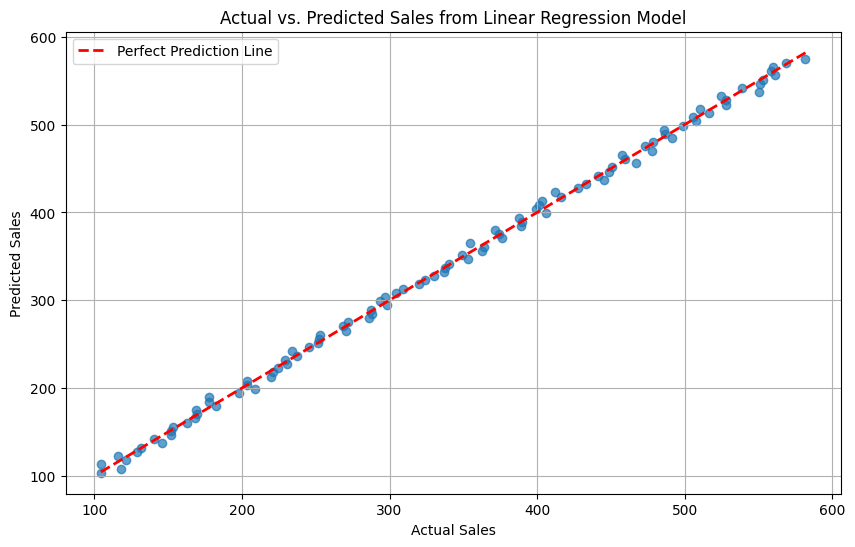

Prediction: [575.16222101]


c:\Users\almehairbi\Desktop\Dell AI\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:
import matplotlib.pyplot as plt

# Generate predictions using the fitted model
predictions = model.predict(X)

# Create a scatter plot of Actual Sales vs. Predicted Sales
plt.figure(figsize=(10, 6))
plt.scatter(Y, predictions, alpha=0.7)

# Add a line representing a perfect prediction (y=x)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2, label='Perfect Prediction Line')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales from Linear Regression Model')
plt.grid(True)
plt.legend()
plt.show()

print("Prediction:", model.predict([[100, 50]]))


This markdown table output is designed for easy display and readability within a Google Colab notebook, providing a clear breakdown of your linear regression model's results based on the provided sources and the output generated from our conversation.

---

## Linear Regression Model Output Summary

Linear regression is a foundational tool for finding a **straight line pattern in data** to **predict the future**. The model successfully found the "line of best fit" for your 100 data points.

### Table 1: Data Structure and Model Setup

| Output Line | Interpretation | Source Connection |
| :--- | :--- | :--- |
| **`# Inputs (X) defined with shape: (100, 2)`** | The model used 100 total rows of data ($N=100$) and **2 input variables** (features) to learn the pattern. These inputs are the 'TV\_Budget' and 'Radio\_Budget'. | |
| **`# Output (Y) defined with shape: (100,)`** | The model had 100 corresponding target values—the **Sales** figures—to predict. | |
| **`# Model successfully created and fitted (learned the pattern).`** | This confirms the completion of the training process (Step 3: using `.fit`), meaning the algorithm has calculated the "perfect numbers" (weights and baseline) needed for the prediction formula. | |

***

### Table 2: Interpreting the Final Results (The Line of Best Fit)

The final learned numbers form the equation—the **mathematical description of that line of best fit**.

| Output Result | Value | Interpretation (Business Insight) | Source Connection |
| :--- | :--- | :--- | :--- |
| **Intercept (Baseline, B)** | **50.57** | This is the model's "starting point" or **baseline**. It represents the model's best guess for what sales would be if **$0 was spent on ads**. | |
| **TV\_Budget Coefficient** | **4.18** | This is the weight applied to the TV budget. This number shows the **Return on Investment (ROI)**. The model predicts that for every single dollar spent on TV advertising, the company will get about **$4.18 back in sales**. | |
| **Radio\_Budget Coefficient** | **2.09** | This weight tells us the influence of the Radio budget. The model predicts that every dollar spent on Radio advertising returns **$2.09 in sales**. | |

### Final Model Interpretation (The Prediction Formula)

The model's only job was to calculate the perfect numbers to plug into the prediction formula. The final result is the complete equation for estimating future sales:

```python
# Final Model Interpretation (The Line of Best Fit Equation):
# Estimated Sales = (4.18 * TV_Budget) + (2.09 * Radio_Budget) + 50.57
```